In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
tetrahedron_points = [np.array([0., 0., 0.]),
                      np.array([1., 0., 0.]),
                      np.array([np.cos(np.pi/3), np.sin(np.pi/3), 0.]),
                      np.array([0.5, 0.5/np.sqrt(3), np.sqrt(2./3.)])]

sampled_points = np.concatenate([np.random.multivariate_normal(point, np.eye(3)*0.0001, 10)
                                 for point in tetrahedron_points])

init_points = np.concatenate([np.random.multivariate_normal(point[:2], np.eye(2)*0.0001, 10)
                              for point in tetrahedron_points])

In [3]:
N = sampled_points.shape[0]
d = sampled_points.shape[1]

In [4]:
X = tf.placeholder('float')
Xshape = tf.shape(X)

sqX = tf.reduce_sum(X*X, 1)
sqX = tf.reshape(sqX, [-1, 1])
sqDX = sqX - 2*tf.matmul(X, tf.transpose(X)) + tf.transpose(sqX)
DX = tf.sqrt(sqDX)

Y = tf.Variable(init_points, dtype='float')
sqY = tf.reduce_sum(Y*Y, 1)
sqY = tf.reshape(sqY, [-1, 1])
sqDY = sqY - 2*tf.matmul(Y, tf.transpose(Y)) + tf.transpose(sqY)
DY = tf.sqrt(sqDY)

In [5]:
Z = tf.reduce_sum(DX)*0.5
numerator = tf.reduce_sum(tf.divide(tf.square(DX-DY), DX+tf.diag(tf.ones(N))))*0.5
cost = numerator / Z

In [6]:
grad_cost = tf.gradients(cost, Y)[0]
lapl_cost = tf.gradients(grad_cost, Y)[0]
Delta = tf.divide(grad_cost, lapl_cost)

In [7]:
update_rule = tf.assign(Y, Y-0.01*grad_cost/lapl_cost)
init = tf.global_variables_initializer()

In [8]:
sess = tf.Session()

In [9]:
sess.run(init)

In [10]:
sess.run(DX, feed_dict={X: sampled_points})

array([[ 0.        ,  0.0259264 ,  0.02811358, ...,  1.00005388,
         0.98332924,  0.98724937],
       [ 0.0259264 ,  0.        ,  0.0239159 , ...,  1.0135951 ,
         0.99689126,  1.00107896],
       [ 0.02811357,  0.0239159 ,  0.        , ...,  1.01134765,
         0.99481976,  0.99873269],
       ..., 
       [ 1.00005388,  1.01359522,  1.01134765, ...,  0.        ,
         0.01865401,  0.01822571],
       [ 0.98332924,  0.99689126,  0.99481976, ...,  0.01865401,
         0.        ,  0.01480426],
       [ 0.98724937,  1.00107908,  0.99873269, ...,  0.01822408,
         0.01480426,  0.        ]], dtype=float32)

In [11]:
sess.run(DY, feed_dict={X: sampled_points})

array([[ 0.        ,  0.01197531,  0.01449757, ...,  0.57438284,
         0.58839118,  0.57982677],
       [ 0.01197531,  0.        ,  0.02401718, ...,  0.57356405,
         0.58769149,  0.57897884],
       [ 0.01449757,  0.02401718,  0.        , ...,  0.58624691,
         0.60016912,  0.59170967],
       ..., 
       [ 0.57438278,  0.57356405,  0.58624691, ...,  0.        ,
         0.01521037,  0.00560992],
       [ 0.58839118,  0.58769149,  0.60016912, ...,  0.01521037,
         0.        ,  0.01127153],
       [ 0.57982677,  0.57897884,  0.59170967, ...,  0.00560992,
         0.01127153,  0.        ]], dtype=float32)

In [12]:
sess.run(grad_cost, feed_dict={X: sampled_points})

array([[ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]], dtype=float32)

In [13]:
nbsteps = 1000
c = sess.run(cost, feed_dict={X: sampled_points})
print "epoch: ", -1, " cost = ", c
for i in range(nbsteps):
    sess.run(update_rule, feed_dict={X: sampled_points})
    c = sess.run(cost, feed_dict={X: sampled_points})
    print "epoch: ", i, " cost = ", c

epoch:  -1  cost =  0.0913704
epoch:  0  cost =  nan
epoch:  1  cost =  nan
epoch:  2  cost =  nan
epoch:  3  cost =  nan
epoch:  4  cost =  nan
epoch:  5  cost =  nan
epoch:  6  cost =  nan
epoch:  7  cost =  nan
epoch:  8  cost =  nan
epoch:  9  cost =  nan
epoch:  10  cost =  nan
epoch:  11  cost =  nan
epoch:  12  cost =  nan
epoch:  13  cost =  nan
epoch:  14  cost =  nan
epoch:  15  cost =  nan
epoch:  16  cost =  nan
epoch:  17  cost =  nan
epoch:  18  cost =  nan
epoch:  19  cost =  nan
epoch:  20  cost =  nan
epoch:  21  cost =  nan
epoch:  22  cost =  nan
epoch:  23  cost =  nan
epoch:  24  cost =  nan
epoch:  25  cost =  nan
epoch:  26  cost =  nan
epoch:  27  cost =  nan
epoch:  28  cost =  nan
epoch:  29  cost =  nan
epoch:  30  cost =  nan
epoch:  31  cost =  nan
epoch:  32  cost =  nan
epoch:  33  cost =  nan
epoch:  34  cost =  nan
epoch:  35  cost =  nan
epoch:  36  cost =  nan
epoch:  37  cost =  nan
epoch:  38  cost =  nan
epoch:  39  cost =  nan
epoch:  40  cost =  

In [14]:
calculated_Y = sess.run(Y, feed_dict={X: sampled_points})

In [15]:
sess.close()

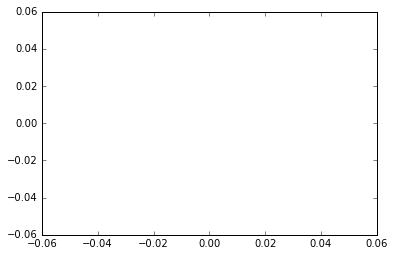

In [16]:
embed1, embed2 = calculated_Y.transpose()
plt.plot(embed1, embed2, 'ro')

In [17]:
calculated_Y

array([[ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]], dtype=float32)

In [18]:
 sess.close()